In [1]:
 # Only use this line to show in jupyter
%matplotlib inline

# from __future__ import print_function

import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using Theano backend.


In [3]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

In [4]:
img_rows, img_cols = 28, 28  
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [5]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# Just take a look at the shape of the pictures
print(len(X_train[0]))
print(len(X_train[0][0]))
print(X_train[0])

28
28
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 

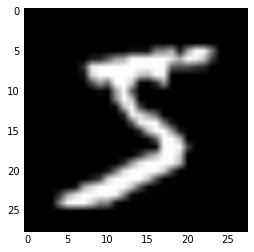

In [7]:
plt.imshow(X_train[0], cmap='gray')

In [8]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [9]:
print(len(X_train[0]))
print(len(X_train[0][0]))
print(X_train[0])

1
28
[[[ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.        ]
  [ 0.          0.  

In [10]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [11]:
print(y_train[0])
print(Y_train[0])

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [12]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [13]:
# Lets explore the model
# http://keras.io/models/about-keras-models/
print(model.summary()) #  summary representation of your model

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_1 (Convolution2D)    (None, 32, 26, 26)  320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 32, 26, 26)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 32, 24, 24)  9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)          (None, 32, 24, 24)  0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [14]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 114s - loss: 0.2407 - acc: 0.9255 - val_loss: 0.0586 - val_acc: 0.9826
Epoch 2/12
60000/60000 [==============================] - 117s - loss: 0.0903 - acc: 0.9731 - val_loss: 0.0413 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 122s - loss: 0.0666 - acc: 0.9802 - val_loss: 0.0335 - val_acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 117s - loss: 0.0573 - acc: 0.9829 - val_loss: 0.0324 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 118s - loss: 0.0503 - acc: 0.9847 - val_loss: 0.0280 - val_acc: 0.9915
Epoch 6/12
60000/60000 [==============================] - 117s - loss: 0.0444 - acc: 0.9864 - val_loss: 0.0289 - val_acc: 0.9912
Epoch 7/12
60000/60000 [==============================] - 119s - loss: 0.0388 - acc: 0.9881 - val_loss: 0.0289 - val_acc: 0.9914
Epoch 8/12
60000/60000 [=======================

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0283172680599
Test accuracy: 0.992


In [21]:
res = model.predict_classes(X_test[100:109])
print(res)

9/9 [==============================] - 0s
[6 0 5 4 9 9 2 1 9]


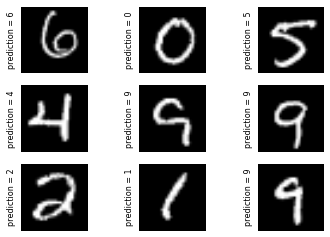

In [22]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i+100, 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = %d" % res[i], fontsize=8)
    #plt.show()
    #print("Prediction = {}".format(res[i]))